# **Voice of Customers**

## **Step 1 : Install and import dependencies**

In [ ]:
!pip install pythainlp
!pip install tensorflow_text
!pip install umap-learn
!pip install pandas==1.1.2

     |████████████████████████████████| 11.0 MB 14.5 MB/s 
     |████████████████████████████████| 743 kB 88.2 MB/s 
     |████████████████████████████████| 4.9 MB 15.1 MB/s 
     |████████████████████████████████| 86 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 63.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=08529a558b5b82e0289550bfafb362b4ba02a690e230aa08b89862768973ef07
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=bc014b80830963afe6351d6b6289ec3fe569b96134a3f730c701cf08f42f867e
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 10.5 MB 8.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
  

In [ ]:
import numpy as np
import pandas as pd
import re

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
import umap

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

import pythainlp
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie
import collections

# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('/content/gdrive/MyDrive/Colab Notebooks/Fonts/k2d-regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [ ]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' 
#'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' for a large model

model = hub.load(module_url)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/์NIDA Class/BADS7105 CRM/Week13 Text processing/Wongnai Reviews - Small.csv")

In [ ]:
df.head()

Review ID                                             Review
0          1  เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเด...
1          2  Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่...
2          3  กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่ค...
3          4  วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออกมาหาอะไ...
4          5  ชอบมาทานร้านนี้ถ้าอยากกินอาหารเวียดนามใกล้บ้าน...

## **Step 2 : Document embedding and dimension reduction**

In [ ]:
#embbed sentences using Universal Sentence Encoder (USE)

embed_comments_array = model(df['Review'].values).numpy()
embed_comments_array

array([[ 0.08993825,  0.01941087,  0.03787041, ..., -0.03488846,
         0.06299512,  0.04635989],
       [ 0.00634238,  0.00814594,  0.03071934, ..., -0.01478722,
        -0.03080936, -0.03316408],
       [ 0.06336872, -0.02027135, -0.05077003, ..., -0.06530775,
        -0.00952999, -0.03439984],
       ...,
       [ 0.08775924,  0.03609739,  0.01263063, ..., -0.03102781,
        -0.03361675,  0.01928869],
       [ 0.05691193,  0.0538169 , -0.03995752, ..., -0.06598806,
        -0.05390476, -0.01037723],
       [ 0.07770479,  0.0508063 ,  0.02680679, ..., -0.0061413 ,
        -0.01313565,  0.02236262]], dtype=float32)

In [ ]:
#reduce array dimensions using umap (you can chagne n_components)

reducer = umap.UMAP(random_state=42,n_components=50)
umap_embed_comments_array = reducer.fit_transform(embed_comments_array)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


## **Step 3 : Document clustering using KMeans**

Text(0, 0.5, 'WCSS')

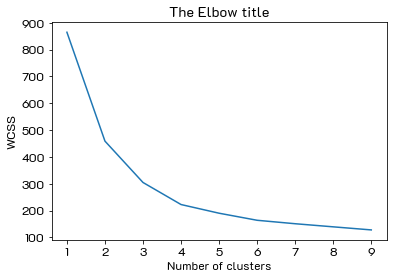

In [ ]:
#run kmeans with various number of k. evaluate no. of k based on the elbow plot

wcss=[]
max_k = 10
for i in range(1, max_k):
  kmeans = KMeans(i)
  kmeans.fit(umap_embed_comments_array)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1, max_k)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
#run kmeans with no. of clusters you see fit the most

k = 4

kmeans = KMeans(n_clusters = k)
kmeans.fit(umap_embed_comments_array)

df['KMeans ID'] = kmeans.labels_

In [ ]:
#merge all reviews of each cluster into one big sentence 

df_kmeans = pd.DataFrame(columns=["KMeans ID", "texts"])


for i in range(0, k):
  row = []
  row.append(i)
  row.append(df['Review'][df['KMeans ID'] == i].to_string())
  df_kmeans.loc[len(df_kmeans)] = row

In [ ]:
pd.set_option('display.max_colwidth', 50)
df_kmeans

KMeans ID                                              texts
0         0  13     เคยเป็นไหมกันไหมคะ หลังอาหารมื้อใหญ่ ต่...
1         1  0      เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีว...
2         2  2      กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูห...
3         3  3      วันนี้มีโอกาสตื่นเช้าครับเลยถึงโอกาสออก...

### **Data Preparation => Cleaning data + word tokenization**

In [ ]:
#create regex compiler for removal of a character you don't want

# special_characters = "/[!@#$%^&*']/g"
special_characters = "/[!@#$%^:;><()\?|&*',-๑๒๓๔๕๖๗๘๙๐]/g"

specialchar_pattern = re.compile(special_characters)
#create regex compiler for removal of any emoji

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
#create regex compiler for removal of digit
number_pattern = re.compile("[0-9]")

#create regex compiler for removal of white space
space_pattern = re.compile("\s+")

#create regex compiler for removal of .
dot_pattern = re.compile(r"\.+")

#create regex compiler for removal of \
backslash_pattern = re.compile(r"\\+")

In [ ]:
# words tokenization
#define a function to tokenize a sentence into words - you can define words you want to remove as well as new words for tokenization

# *************************************************************************************************
stopwords = list(pythainlp.corpus.thai_stopwords())
removed_words = ['u', 'b', 'n', 'nn', 'nn-', 'ร้าน', 'ร้านนี้', 'กก', 'ผม', 'มีโอกาส', 'นะคะ', 'บอ', 'หา', 'กร้าน', 'เช้า', 'โอกาส', 
                 'เค้า', 'บ้าน', 'ถนน', 'เก', 'เดิน', 'เกริ่น', 'เมือง', 'พัทยา', 'เค', 'สำหรับ', 'อย่า', 'คน', 'ค', 'เป็ร้าน', 'ขา', 'สวัสดี', 
                 'เพื่อน', 'ไทย', 'ไร้', 'าน', 'ส', 'เก่าแก่', 'รอบ', 'ห', 'หัว', 'หิน', 'สไตล์', 'ดีล', 'ข', 'น', 'สา', 'สุขุมวิท', 'แคนยอน', 'สาขา', 'ขาย', 'ขับรถ', 'เข้ามา', '(', 
                 'แพง', 'อาศัย', 'ญี่ปุ่น', 'หลากหลาย', 'ท', 'เวลา', 'นึง', 'ชั้น', 'ซอย', 'เซ็นทรัล', 'พระราม', 'กวง', 'Wongna', 'นั่ง',
                  'อ', 'วัง', 'แนว', 'เม', 'ซอน', 'ตกแต่ง', 'รี่', 'อี', 'ลอง', 'แถว', 'รอ', 'พัก', 'นอ', 'อย',  'บรรยากาศ', 'ประ', 'เหมือน', 'มาจาก', 'ห้าง', 'รถ',  
                 'พิม', 'เลี่ยง', 'หนอง', 'มน', 'ร้', 'ร', 'โต๊ะ', 'เบอ', 'อา', 'จ', 'ริ', 'พญาไท', 'เดือน', 'คลาสสิค', 'นึก', 'เด่น', 'โซน', 'ร่ำ', 'พี่ชาย', 'จังหวัด',  
                 'เดินผ่าน', 'ไปมา', 'เ', 'เล','ไปหา', 'ชิล', 'เก้าอี้', 'ไ', 'ป', 'พัฒนาการ', 'ชี', 'ไส', 'ต์', '-cake', 'แอนด์', 'แบ', 'ร่', 'เข้าไป', 'บรรยาย', 'แร้าน', 
                 'ทรู',  'ี่', 'นี', 'ล้างรถ', 'ชื่อว่า', 'โลตัส', 'หลาน', 'ที่ตั้ง', 'ติด', 'ต่อให้', 'บ่าย', 'เย็น', 'คนเรา', 'ไต้หวัน', 'นิว', 'คุง', 'Aprilstore', 'สยาม', 'ไหม',
                 'เป็นกันเอง', 'นรสิงห์','หว่าง', 'มุ่งหน้า', 'ชัยภูมิ', 'พลัง', 'กันที่', 'กระทัดรัด', 'พื้นที่', 'ี', 'หลายครั้ง', 'สังเกตว่า', 'ซุ้ม', "!", 'อ่', 'กา', 'ศ', 'n------------', 'จา',
                 'Big-C', 'เย', ' ี่', 'Starbucksn', ':', 'ค่', 'ๆาน', 'ราช', 'ดำริ', 'ตึก', 'ออฟ', 'ฟ', 'ยู', 'ว่', 'ตลก', 'Ochaya', 'dessennnnn', 'Dakasi', 'ร้าย', 'ยี่', 'ห้', 
                 'เว', 'ๆๆ', 'ๆอร่', 'ไอ', 'ศรี', 'ม', 'เข', ' ี', 'อิ่', 'จัระ', 'เด', 'เร้า', 'นขา', 'ย', '>>', 'หว', 'Macchiato', 'Icecaramelmacchiato', '-', '--',
                  ')', 'Cap', 'Mocha', 'nTamp', 'tamp']

screening_words = stopwords + removed_words

new_words = {"สตารบัก","ชีสเค้ก", "มัคคียาโต", "อากาศ", "ไอซ์คาราเมลมัคคิอาโต", "ไอศครีม", "ชาเขียว", "ชานมไข่มุก", "โอชายะ", "ดาคาซี่", "ยี่ห้อ", "มอคค่า"}
# *************************************************************************************************

words = new_words.union(thai_words())

custom_dictionary_trie = Trie(words)

def tokenize_to_list(sentence):
  merged = []
  words = pythainlp.word_tokenize(str(sentence), engine='newmm', custom_dict=custom_dictionary_trie)
  for word in words:
    if word not in screening_words:
      merged.append(word)
  return merged

In [ ]:
#clean and tokenize sentences. count the occurences of each word

df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_kmeans['texts'] = df_kmeans['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_kmeans['texts_tokenized'] = df_kmeans['texts'].apply(lambda x: tokenize_to_list(x))
df_kmeans['texts_count'] = df_kmeans['texts_tokenized'].apply(lambda x: collections.Counter(x).most_common())

In [ ]:
#results of tokenization
pd.set_option('display.max_colwidth', 50)
df_kmeans

KMeans ID  ...                                        texts_count
0         0  ...  [(ชา, 9), (ชานมไข่มุก, 9), (ทาน, 6), (ไข่มุก, ...
1         1  ...  [(ร้านกาแฟ, 23), (กาแฟ, 19), (ทาน, 11), (ชอบ, ...
2         2  ...  [(ร้านอาหาร, 11), (อร่อย, 6), (กิน, 6), (อาหาร...
3         3  ...  [(กิน, 11), (อร่อย, 9), (ทาน, 7), (รีวิว, 6), ...

[4 rows x 4 columns]

In [ ]:
#show top keywords of each cluster

top_N_words = 10

for i in range(0, len(df_kmeans)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_kmeans['texts_count'][i])[:top_N_words]}\n")

#tune a model by remove unwanted characters and words and add more words to a custom dictionary


Cluster ID : 0

Most common words include : [('อร่อย', 206), ('รสชาติ', 175), ('ทาน', 156), ('จาน', 131), ('อาหาร', 121), ('เมนู', 111), ('ดี', 105), ('สั่ง', 99), ('กิน', 89), ('เนื้อ', 87)]

Cluster ID : 1

Most common words include : [('กาแฟ', 211), ('ทาน', 107), ('อร่อย', 102), ('ดี', 101), ('เค้ก', 91), ('รสชาติ', 81), ('ราคา', 75), ('ร้านกาแฟ', 72), ('สั่ง', 69), ('ชอบ', 62)]

Cluster ID : 2

Most common words include : [('ชา', 115), ('รสชาติ', 75), ('บาท', 72), ('นม', 63), ('เมนู', 57), ('ไข่มุก', 57), ('หวาน', 57), ('อร่อย', 55), ('ราคา', 54), ('ทาน', 53)]

Cluster ID : 3

Most common words include : [('กิน', 152), ('อร่อย', 147), ('อาหาร', 112), ('ทาน', 101), ('ดี', 101), ('สั่ง', 99), ('เมนู', 84), ('รสชาติ', 83), ('ราคา', 71), ('ชอบ', 68)]



In [ ]:
df_kmeans

KMeans ID  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 texts_count
0         0  ...      [(อร่อย, 206), (รสชาติ, 175), (ทาน, 156), (จาน, 131), (อาหาร, 121), (เมนู, 111), (ดี, 105), (สั่ง, 99), (กิน, 89), (เนื้อ, 87), (ปลา, 77), (ราคา, 75), (หมู, 74), (ชอบ, 71), (บาท, 67), (หอม, 61), (ทอด, 59), (กรอบ, 58), (น้ำ, 55), (หวาน, 54), (กุ้ง, 53), (ซอส, 53), (ดู, 50), (ไก่, 48), (สลัด, 47), (ยำ, 46), (ส้มตำ, 46), (ใส่, 45), (ที่นี่, 45), (ผัด, 43), (รส, 42), (เลือก, 41), (เผ็ด, 38), (ชิ้น, 38), (ผัก, 38), (", 38), (ย่าง, 37), (แนะนำ, 36), (นุ่ม, 35), (กาแฟ, 33), (ร้านอาหาร, 32), (ซุป, 32), (ปู, 31), (หน้า, 31), (กลิ่น, 29), (ตัว, 29), (เข้มข้น, 28), (ชิม, 27), (สด, 26), (เส้น, 26), (แป้ง, 26), (ไข่, 26), (ทำ, 26), (แซ่บ, 25), (เค็ม, 25), (ข้าว, 25), (กำลังดี, 24), (น้ำจิ้ม, 24), (ข้าวผัด, 23), (ชีส, 23), (เห็ด, 23), (ราด, 23), (ใช้ได้, 22), (บริการ, 22), (n-, 22), (เลี่ยน, 21), (สูตร, 21), (พริก, 20), (เปรี้ยว, 20), (ที่นั่ง, 20), (แซลมอน, 20), (เสิร์ฟ, 20), (nnn, 20), (เครื่อง, 19), (รู้, 19), (มะม่วง, 19), (คุ้ม, 19), (ออกมา, 19), (ชา, 19), (ก๋วยเตี๋ยว, 19), (แล้วก็, 19), (จืด, 19), (ธรรมดา, 19), (ยังมี, 19), (เป็ด, 19), (แถม, 18), (ร้อน, 17), (สปา, 17), (ขนมปัง, 17), (มะนาว, 17), (รู้สึก, 17), (อันนี้, 17), (กระ, 16), (ผลไม้, 16), (เค้ก, 16), (พนักงาน, 16), (เต็ม, 16), (ตัก, 15), (เล่น, 15), (ผิดหวัง, 15), ...]
1         1  ...    [(กาแฟ, 211), (ทาน, 107), (อร่อย, 102), (ดี, 101), (เค้ก, 91), (รสชาติ, 81), (ราคา, 75), (ร้านกาแฟ, 72), (สั่ง, 69), (ชอบ, 62), (เมนู, 59), (ชา, 59), (กิน, 51), (บาท, 51), (เครื่องดื่ม, 45), (อาหาร, 44), (หวาน, 41), (บริการ, 39), (ดู, 37), (หอม, 35), (ดื่ม, 34), (แก้ว, 32), (เลือก, 30), (พาย, 29), (ร้อน, 27), (น่ารัก, 26), (แนะนำ, 26), (ทำ, 22), (แวะ, 22), (นม, 20), (ขนม, 20), (เข้มข้น, 20), (รส, 20), (คา, 20), (ชิม, 19), (ซื้อ, 19), (เบเกอรี่, 19), (ยังมี, 18), (นุ่ม, 17), (เล่น, 17), (แมว, 17), (ครีม, 16), (ที่นี่, 16), (ชิ้น, 16), (ใส่, 16), (ที่นั่ง, 16), (แล้วก็, 16), (ตั้งอยู่, 16), (สวย, 16), (ลาเต้, 15), (กลิ่น, 15), (ปั่น, 15), (เทียบ, 14), (ใช้ได้, 14), (ชิ, 14), (กาแฟสด, 14), (พนักงาน, 13), (น้ำ, 13), (เนื้อ, 13), (ว, 13), (โก, 13), (โน่, 13), (คอ, 13), (โซฟา, 13), (เจอ, 12), (แอร์, 12), (<, 12), (์, 12), (เจ้าของร้าน, 12), (คู่, 12), (ปู, 12), (มุม, 12), (^^, 11), (>/, 11), (จิบ, 11), (ครัวซอง, 11), (คุย, 11), (หน้า, 11), (เหมาะกับ, 11), (ดีกว่า, 11), (โกโก้, 11), (รีวิว, 11), (ตอน, 10), (ออกมา, 10), (แถม, 10), (ขนมปัง, 10), (ตัว, 10), (ถ้วย, 10), (เครป, 10), (พระราชวัง, 10), (ถ่ายรูป, 10), (น้อง, 10), (ลูกค้า, 9), (วิจารณ์, 9), (คะแนน, 9), (ร้านอาหาร, 9), (กลางๆ, 9), (ด้านใน, 9), (ห้อง, 9), (ธรรมดา, 9), ...]
2         2  ...                                               [(ชา, 115), (รสชาติ, 75), (บาท, 72), (นม, 63), (เมนู, 57), (ไข่มุก, 57), (หวาน, 57), (อร่อย, 55), (ราคา, 54), (ทาน, 53), (กิน, 49), (ชานมไข่มุก, 45), (ดี, 4

## **Step 4 : Document clustering using Agglomorative Clustering with cosine similarity**

In [ ]:
#clustering using agglomorative clustering

knn_graph = kneighbors_graph(embed_comments_array, 5, include_self=False)
model = AgglomerativeClustering(linkage="average", connectivity=knn_graph, n_clusters=10, affinity="cosine")   #ใช้ cosinee similarity 
model.fit(embed_comments_array)
df['Agglomerative ID'] = model.labels_

In [ ]:
#merge all reviews of each cluster into one big sentence 

df_Agglomerative = pd.DataFrame(columns=["Agglomerative ID", "texts"])


for i in range(0, k):
  row = []
  row.append(i)
  row.append(str(df['Review'][df['Agglomerative ID'] == i].tolist()))
  df_Agglomerative.loc[len(df_Agglomerative)] = row

In [ ]:
#clean and tokenize sentences. count the occurences of each word

df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: emoji_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: specialchar_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: number_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: space_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: dot_pattern.sub(r'', x))
df_Agglomerative['texts'] = df_Agglomerative['texts'].apply(lambda x: backslash_pattern.sub(r'', x))
df_Agglomerative['texts_tokenized'] = df_Agglomerative['texts'].apply(lambda x: tokenize_to_list(x))
df_Agglomerative['texts_count'] = df_Agglomerative['texts_tokenized'].apply(lambda x: collections.Counter(x).most_common())

In [ ]:
#show top keywords of each cluster

top_N_words = 30

for i in range(0, len(df_Agglomerative)):
  print(f"Cluster ID : {i}\n")
  print(f"Most common words include : {list(df_Agglomerative['texts_count'][i])[:top_N_words]}\n")

Cluster ID : 0

Most common words include : [('อร่อย', 508), ('ทาน', 416), ('รสชาติ', 407), ('ดี', 347), ('กิน', 339), ('กาแฟ', 311), ('เมนู', 309), ('สั่ง', 301), ('อาหาร', 285), ('ราคา', 273), ('บาท', 242), ('ชอบ', 229), ("','", 215), ('ชา', 212), ('หวาน', 206), ('จาน', 196), ('ดู', 147), ('หอม', 136), ('รส', 136), ('เนื้อ', 130), ('เลือก', 126), ('เครื่องดื่ม', 122), ('เค้ก', 121), ('บริการ', 116), ('น้ำ', 111), ('ใส่', 107), ('หมู', 107), ('นม', 99), ('ร้านกาแฟ', 97), ('แนะนำ', 95)]

Cluster ID : 1

Most common words include : [('แตงโม', 22), ('น้ำ', 8), ('ปั่น', 6), ('เนื้อ', 6), ('เลือก', 4), ('ซื้อ', 4), ('ดื่ม', 4), ('พันธุ์', 3), ('รับประทาน', 3), ('แก้', 3), ('อาหาร', 3), ('ร่างกาย', 3), ('เมล็ด', 2), ('มีรส', 2), ('หวาน', 2), ('ยังมี', 2), ('วิตามิน', 2), ('สีแดง', 2), ('ผลไม้', 2), ('กระหาย', 2), ('ดี', 2), ('ล้าง', 2), ('โรค', 2), ("['", 1), ('ประโยชน์', 1), ('นิยม', 1), ('จินต', 1), ('หรา', 1), ('ตอ', 1), ('ปิ', 1)]

Cluster ID : 2

Most common words include : [('ดิชั้น',

In [ ]:
# pd.set_option('display.max_colwidth', None)
# df[df['Review'].str.contains("อร่อย")]

## **Step : 5 Generate TF-IDF find importance word each document**

Referrrence : https://bigdata.go.th/big-data-101/data-science/tf-idf-2/

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_Agglomerative[3:4]['texts_tokenized']

3    [[', เรื่อง, ขนม, สันทัด, ดังนั้น, review, เฉพาะเรื่อง, กาแฟร้อน, แน่น, มากเกินไป, โถม, ย้ำ, มีผลต่อ, ช๊อต, กาแฟ, แน่น, ซ๊อต, พี่, เล่น, รอง, น้ำร้อน, เท, เติม, ดื้อ, งัั้น, แก้, ตั้งแต่แรก, ดีกว่า, ตี, นม, เสด, มาส, ปิน, แก้, ทำ, หก, เจอ, อีกแล้ว, ช้อน, ตัก, ฟอง, นม, ออกมา, เท, นม, โปะ, อีกที, อันนี้, โอเค, แนะนำ, ถนัด, ']]
Name: texts_tokenized, dtype: object

In [ ]:
df_Agglomerative[3:4]['texts_tokenized'][3]

["['",
 'เรื่อง',
 'ขนม',
 'สันทัด',
 'ดังนั้น',
 'review',
 'เฉพาะเรื่อง',
 'กาแฟร้อน',
 'แน่น',
 'มากเกินไป',
 'โถม',
 'ย้ำ',
 'มีผลต่อ',
 'ช๊อต',
 'กาแฟ',
 'แน่น',
 'ซ๊อต',
 'พี่',
 'เล่น',
 'รอง',
 'น้ำร้อน',
 'เท',
 'เติม',
 'ดื้อ',
 'งัั้น',
 'แก้',
 'ตั้งแต่แรก',
 'ดีกว่า',
 'ตี',
 'นม',
 'เสด',
 'มาส',
 'ปิน',
 'แก้',
 'ทำ',
 'หก',
 'เจอ',
 'อีกแล้ว',
 'ช้อน',
 'ตัก',
 'ฟอง',
 'นม',
 'ออกมา',
 'เท',
 'นม',
 'โปะ',
 'อีกที',
 'อันนี้',
 'โอเค',
 'แนะนำ',
 'ถนัด',
 "']"]

In [ ]:
doc_1 = df_Agglomerative[0:1]['texts_tokenized'][0]
doc_2 = df_Agglomerative[1:2]['texts_tokenized'][1]
doc_3 = df_Agglomerative[2:3]['texts_tokenized'][2]
doc_4 = df_Agglomerative[3:4]['texts_tokenized'][3]

doc = [doc_1, doc_2, doc_3, doc_4]

In [ ]:
def identity_fun(text):
    return text

In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', #this is default
                                   tokenizer= identity_fun, #does no extra tokenizing
                                   preprocessor=identity_fun, #no extra preprocessor
                                   token_pattern=None)

#สุ่มช่วงของ 5 เอกสารที่ติดกันมาทดลองใช้งาน
tfidf_vector= tfidf_vectorizer.fit_transform(doc)
tfidf_array = np.array(tfidf_vector.todense())

#แปลงเป็น DataFrame เพื่อง่ายแก่การอ่าน
df_tfidf = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names())
df_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


!!       !!!    !!!!!   !!!!!!  ...       ✏️       ✔️    ⭐⭐⭐⭐/       ｀)
0  0.008876  0.010355  0.00074  0.00074  ...  0.00074  0.00074  0.00074  0.00074
1  0.000000  0.000000  0.00000  0.00000  ...  0.00000  0.00000  0.00000  0.00000
2  0.000000  0.000000  0.00000  0.00000  ...  0.00000  0.00000  0.00000  0.00000
3  0.000000  0.000000  0.00000  0.00000  ...  0.00000  0.00000  0.00000  0.00000

[4 rows x 5384 columns]

In [ ]:
# คำที่มีค่า TF-IDF สูงที่สุด 10 คำแรกของแต่ละบทความ
print(df_tfidf.apply(lambda s: s.nlargest(20).index.tolist(), axis=1).ravel())

[list(['อร่อย', 'ทาน', 'รสชาติ', 'สั่ง', 'ดี', 'ราคา', 'กิน', 'เมนู', 'บาท', "','", 'ชา', 'อาหาร', 'ชอบ', 'หวาน', 'กาแฟ', 'จาน', 'หอม', 'เค้ก', 'ดู', 'รส'])
 list(['แตงโม', 'น้ำ', 'ปั่น', 'เนื้อ', 'ซื้อ', 'ดื่ม', 'เลือก', 'พันธุ์', 'รับประทาน', 'ร่างกาย', 'วิตามิน', 'อาหาร', 'แก้', 'กระหาย', 'ดี', 'ผลไม้', 'มีรส', 'ยังมี', 'ล้าง', 'สีแดง'])
 list(['ดิชั้น', 'แย่มาก', 'แก้ว', 'รอง', 'กระแทก', 'ช้ัน', 'ทบ', '?', 'คุย', 'จาน', 'ดิ', 'ดู', 'บริการ', 'พนักงาน', 'พนักงานบริการ', 'ยืน', 'สิ', 'ส่ัง', 'หันไป', 'เปล่า'])
 list(['นม', 'เท', 'แน่น', 'แก้', 'งัั้น', 'ซ๊อต', 'ดื้อ', 'ตั้งแต่แรก', 'มีผลต่อ', 'สันทัด', 'เฉพาะเรื่อง', 'เสด', 'โถม', 'review', 'กาแฟร้อน', 'ขนม', 'ช้อน', 'ช๊อต', 'ดังนั้น', 'ดีกว่า'])]


## **Step 6 : Generate Text summary in 4 Group by TF-IDF (เพื่อสรุป document และให้คงไว้ซึ่ง Semantic)**

In [ ]:
df.head(300)

Review ID  ... Agglomerative ID
0            1  ...                0
1            2  ...                0
2            3  ...                0
3            4  ...                0
4            5  ...                0
..         ...  ...              ...
295        296  ...                0
296        297  ...                0
297        298  ...                0
298        299  ...                0
299        300  ...                0

[300 rows x 4 columns]

In [ ]:
df.columns

Index(['Review ID', 'Review', 'KMeans ID', 'Agglomerative ID'], dtype='object')

In [ ]:
# Cleaning Data
document = df.drop(['Agglomerative ID'], axis=1)
# document = document.dropna
print(document)

     Review ID  ... KMeans ID
0            1  ...         1
1            2  ...         1
2            3  ...         0
3            4  ...         3
4            5  ...         3
..         ...  ...       ...
295        296  ...         0
296        297  ...         1
297        298  ...         1
298        299  ...         1
299        300  ...         1

[300 rows x 3 columns]


In [ ]:
document

Review ID  ... KMeans ID
0            1  ...         1
1            2  ...         1
2            3  ...         0
3            4  ...         3
4            5  ...         3
..         ...  ...       ...
295        296  ...         0
296        297  ...         1
297        298  ...         1
298        299  ...         1
299        300  ...         1

[300 rows x 3 columns]

In [ ]:
sentences_1 = []
sentences_2 = []
sentences_3 = []
sentences_4 = []

for i in range(len(document.index)):
  for sentence in document['Review'][i]:
    # print(df['KMeans ID'][i] == 0)
       sentence_1 = []
       sentence_2 = []
       sentence_3 = []
       sentence_4 = []
       if document['KMeans ID'][i] == 0:
         sentence_1 = sentence_1 + [document['Review'][i]]
        #  sentence_1.append(document['Review'][i])
  # sentences_1.append('\n'.join(sentence_1))
       if document['KMeans ID'][i] == 1:
         sentence_2 = sentence_2 + [document['Review'][i]]
       if document['KMeans ID'][i] == 2:
         sentence_3 = sentence_3 + [document['Review'][i]]
       if document['KMeans ID'][i] == 3:
         sentence_4 = sentence_4 + [document['Review'][i]]  
  sentences_1.append(''.join(sentence_1))
  sentences_2.append(''.join(sentence_2))
  sentences_3.append(''.join(sentence_3))
  sentences_4.append(''.join(sentence_4))

print(sentences_1)
print(sentences_2)
print(sentences_3)
print(sentences_4)

['', '', 'กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะ \nฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระทะน้ำม้นงี้เยิ่มเลยถ้าทานช้าหายร้อนแล้วจะไม่อร่อยทันทีปูผัดพริกไทยดำ เนื้อปูสดรสชาติเข้มข้น หอมกลิ่นเครื่องเทศผัดจนเข้าไปผสมกับเนื้อปูกันเลยทีเดียว จานนี้ก็ห้ามพลาดเด็ดขาด ควรสั่งอย่างยิ่งโป๊ะแตก รสไม่จัดจ้านเท่าไรแต่ขอบอกแก้เลี่ยนได้ดีและคนไม่กินเผ็ดจะถูกใจมากเช่นนานา เพราะพอเข้าปากนะหือชุ่มคอ กินน้ำหมดหม้อเลยข้าวผัดปูไม่แนะนำตามหลักอาหารจีนถึงเราสั่งเป็นรายการแรกแต่ชอบเอามาส่งทีหลังแล้วจะทานกะอะไรล่ะกินกับจะเกลี้ยงหมดแล้วที่สำคัญไม่อร่อยค่ะถ้าจะสั่งก็จานเล็กๆพอ ปลากระพงทอดน้ำปลาเมนูนี้ก็ห้ามพลาดนะ ปลางี้กร๊อบกรอบ เนื้อปลาก็สดด้วยใส่น้ำจ้ิมเข้าไปแจ่มมากกกกหอยล

In [ ]:
sentences_1 = list(filter(None, sentences_1))
sentences_2 = list(filter(None, sentences_2))
sentences_3 = list(filter(None, sentences_3))
sentences_4 = list(filter(None, sentences_4))
print(sentences_1)
print(sentences_2)
print(sentences_3)
print(sentences_4)

print(len(sentences_1))
print(len(sentences_2))
print(len(sentences_3))
print(len(sentences_4))

['กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะ \nฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระทะน้ำม้นงี้เยิ่มเลยถ้าทานช้าหายร้อนแล้วจะไม่อร่อยทันทีปูผัดพริกไทยดำ เนื้อปูสดรสชาติเข้มข้น หอมกลิ่นเครื่องเทศผัดจนเข้าไปผสมกับเนื้อปูกันเลยทีเดียว จานนี้ก็ห้ามพลาดเด็ดขาด ควรสั่งอย่างยิ่งโป๊ะแตก รสไม่จัดจ้านเท่าไรแต่ขอบอกแก้เลี่ยนได้ดีและคนไม่กินเผ็ดจะถูกใจมากเช่นนานา เพราะพอเข้าปากนะหือชุ่มคอ กินน้ำหมดหม้อเลยข้าวผัดปูไม่แนะนำตามหลักอาหารจีนถึงเราสั่งเป็นรายการแรกแต่ชอบเอามาส่งทีหลังแล้วจะทานกะอะไรล่ะกินกับจะเกลี้ยงหมดแล้วที่สำคัญไม่อร่อยค่ะถ้าจะสั่งก็จานเล็กๆพอ ปลากระพงทอดน้ำปลาเมนูนี้ก็ห้ามพลาดนะ ปลางี้กร๊อบกรอบ เนื้อปลาก็สดด้วยใส่น้ำจ้ิมเข้าไปแจ่มมากกกกหอยลายผัดพริ

In [ ]:
pack_sent = [sentences_1, sentences_2, sentences_3, sentences_4]
sentences_one = []
sentences_two = []
sentences_three = []
sentences_four = []

for i in range(len(pack_sent)):
  sentence_one = []
  sentence_two = []
  sentence_three = []
  sentence_four = []
  for sentence_split in pack_sent[i]:
    sentences_split = sentence_split.split("\n")
      # print(sentences_split)
    for doc in sentences_split:
      # print(type(doc))
      # print(doc)
      doc = doc.rstrip()
        # sentences_split2 = doc.split("\n")
      # sentences_one.append(''.join(doc))
      if i == 0:
        sentences_one.append(''.join(doc))
      elif i == 1:
        sentences_two.append(''.join(doc))
      elif i == 2:
        sentences_three.append(''.join(doc))
      elif i == 3:
        sentences_four.append(''.join(doc))


sentences_one = list(filter(None, sentences_one))
sentences_two = list(filter(None, sentences_two))
sentences_three = list(filter(None, sentences_three))
sentences_four = list(filter(None, sentences_four))

print(sentences_one)
print(sentences_two)
print(sentences_three)
print(sentences_four)

['กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะ', 'ฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระทะน้ำม้นงี้เยิ่มเลยถ้าทานช้าหายร้อนแล้วจะไม่อร่อยทันทีปูผัดพริกไทยดำ เนื้อปูสดรสชาติเข้มข้น หอมกลิ่นเครื่องเทศผัดจนเข้าไปผสมกับเนื้อปูกันเลยทีเดียว จานนี้ก็ห้ามพลาดเด็ดขาด ควรสั่งอย่างยิ่งโป๊ะแตก รสไม่จัดจ้านเท่าไรแต่ขอบอกแก้เลี่ยนได้ดีและคนไม่กินเผ็ดจะถูกใจมากเช่นนานา เพราะพอเข้าปากนะหือชุ่มคอ กินน้ำหมดหม้อเลยข้าวผัดปูไม่แนะนำตามหลักอาหารจีนถึงเราสั่งเป็นรายการแรกแต่ชอบเอามาส่งทีหลังแล้วจะทานกะอะไรล่ะกินกับจะเกลี้ยงหมดแล้วที่สำคัญไม่อร่อยค่ะถ้าจะสั่งก็จานเล็กๆพอ ปลากระพงทอดน้ำปลาเมนูนี้ก็ห้ามพลาดนะ ปลางี้กร๊อบกรอบ เนื้อปลาก็สดด้วยใส่น้ำจ้ิมเข้าไปแจ่มมากกกกหอยลายผัดพร

In [ ]:
print(len(sentences_one))
print(len(sentences_two))
print(len(sentences_three))
print(len(sentences_four))

766
473
341
503


In [ ]:
pd.set_option('display.max_colwidth', None)
df_kmeans

KMeans ID  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 texts_count
0         0  ...      [(อร่อย, 206), (รสชาติ, 175), (ทาน, 156), (จาน, 131), (อาหาร, 121), (เมนู, 111), (ดี, 105), (สั่ง, 99), (กิน, 89), (เนื้อ, 87), (ปลา, 77), (ราคา, 75), (หมู, 74), (ชอบ, 71), (บาท, 67), (หอม, 61), (ทอด, 59), (กรอบ, 58), (น้ำ, 55), (หวาน, 54), (กุ้ง, 53), (ซอส, 53), (ดู, 50), (ไก่, 48), (สลัด, 47), (ยำ, 46), (ส้มตำ, 46), (ใส่, 45), (ที่นี่, 45), (ผัด, 43), (รส, 42), (เลือก, 41), (เผ็ด, 38), (ชิ้น, 38), (ผัก, 38), (", 38), (ย่าง, 37), (แนะนำ, 36), (นุ่ม, 35), (กาแฟ, 33), (ร้านอาหาร, 32), (ซุป, 32), (ปู, 31), (หน้า, 31), (กลิ่น, 29), (ตัว, 29), (เข้มข้น, 28), (ชิม, 27), (สด, 26), (เส้น, 26), (แป้ง, 26), (ไข่, 26), (ทำ, 26), (แซ่บ, 25), (เค็ม, 25), (ข้าว, 25), (กำลังดี, 24), (น้ำจิ้ม, 24), (ข้าวผัด, 23), (ชีส, 23), (เห็ด, 23), (ราด, 23), (ใช้ได้, 22), (บริการ, 22), (n-, 22), (เลี่ยน, 21), (สูตร, 21), (พริก, 20), (เปรี้ยว, 20), (ที่นั่ง, 20), (แซลมอน, 20), (เสิร์ฟ, 20), (nnn, 20), (เครื่อง, 19), (รู้, 19), (มะม่วง, 19), (คุ้ม, 19), (ออกมา, 19), (ชา, 19), (ก๋วยเตี๋ยว, 19), (แล้วก็, 19), (จืด, 19), (ธรรมดา, 19), (ยังมี, 19), (เป็ด, 19), (แถม, 18), (ร้อน, 17), (สปา, 17), (ขนมปัง, 17), (มะนาว, 17), (รู้สึก, 17), (อันนี้, 17), (กระ, 16), (ผลไม้, 16), (เค้ก, 16), (พนักงาน, 16), (เต็ม, 16), (ตัก, 15), (เล่น, 15), (ผิดหวัง, 15), ...]
1         1  ...    [(กาแฟ, 211), (ทาน, 107), (อร่อย, 102), (ดี, 101), (เค้ก, 91), (รสชาติ, 81), (ราคา, 75), (ร้านกาแฟ, 72), (สั่ง, 69), (ชอบ, 62), (เมนู, 59), (ชา, 59), (กิน, 51), (บาท, 51), (เครื่องดื่ม, 45), (อาหาร, 44), (หวาน, 41), (บริการ, 39), (ดู, 37), (หอม, 35), (ดื่ม, 34), (แก้ว, 32), (เลือก, 30), (พาย, 29), (ร้อน, 27), (น่ารัก, 26), (แนะนำ, 26), (ทำ, 22), (แวะ, 22), (นม, 20), (ขนม, 20), (เข้มข้น, 20), (รส, 20), (คา, 20), (ชิม, 19), (ซื้อ, 19), (เบเกอรี่, 19), (ยังมี, 18), (นุ่ม, 17), (เล่น, 17), (แมว, 17), (ครีม, 16), (ที่นี่, 16), (ชิ้น, 16), (ใส่, 16), (ที่นั่ง, 16), (แล้วก็, 16), (ตั้งอยู่, 16), (สวย, 16), (ลาเต้, 15), (กลิ่น, 15), (ปั่น, 15), (เทียบ, 14), (ใช้ได้, 14), (ชิ, 14), (กาแฟสด, 14), (พนักงาน, 13), (น้ำ, 13), (เนื้อ, 13), (ว, 13), (โก, 13), (โน่, 13), (คอ, 13), (โซฟา, 13), (เจอ, 12), (แอร์, 12), (<, 12), (์, 12), (เจ้าของร้าน, 12), (คู่, 12), (ปู, 12), (มุม, 12), (^^, 11), (>/, 11), (จิบ, 11), (ครัวซอง, 11), (คุย, 11), (หน้า, 11), (เหมาะกับ, 11), (ดีกว่า, 11), (โกโก้, 11), (รีวิว, 11), (ตอน, 10), (ออกมา, 10), (แถม, 10), (ขนมปัง, 10), (ตัว, 10), (ถ้วย, 10), (เครป, 10), (พระราชวัง, 10), (ถ่ายรูป, 10), (น้อง, 10), (ลูกค้า, 9), (วิจารณ์, 9), (คะแนน, 9), (ร้านอาหาร, 9), (กลางๆ, 9), (ด้านใน, 9), (ห้อง, 9), (ธรรมดา, 9), ...]
2         2  ...                                               [(ชา, 115), (รสชาติ, 75), (บาท, 72), (นม, 63), (เมนู, 57), (ไข่มุก, 57), (หวาน, 57), (อร่อย, 55), (ราคา, 54), (ทาน, 53), (กิน, 49), (ชานมไข่มุก, 45), (ดี, 4

In [ ]:
df_c = df['Review'].values.tolist()
df_c

['เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเดินเข้าไปสั่ง ความคิดแรกที่เห็นปริมาณของกาแฟร้อนก็เฟลแล้ว มีอยู่ครึ่งแก้วน้อยๆได้ พอตอนดื่มยิ่งเฟลหนักกว่าเดิม หาความเป็น Macchiato ไม่เจอเลย หลังจากนี้ลาขาด กินกาแฟโบราณแก้วละ 20 บาทยังมีความสุขมากกว่าอีก',
 'Art of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่ยม ราคาไม่แพง บรรยากาศนั่งสบาย \n\nพนักงานที่ร้านน่ารักมาก อัธยาศัยดี พูดจากับลูกค้าเพราะมาก ทำให้อยากไปอุดหนุนบ่อยๆ ^^\n\nเมนูที่ต้องสั่ง \n\n-เอ๊กซ์เพรสโซ่ไอซ์ ลาเต้ไอซ คาราเมล มัคคิอาโต้\n\n-ชาอัสสัมชาซีลอน\n\n-อิตาเลียนโซดา',
 'กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะ \nฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระทะน้ำม้นงี้เยิ่มเลยถ้าทานช้าหายร้อนแล้วจะไ

In [ ]:
# Read data & Looping through the paragraphs and adding them to the variable
list_articlecontent = [sentences_one, sentences_two, sentences_three, sentences_four]
article_content1 = ''
article_content2 = ''
article_content3 = ''
article_content4 = ''

for i in range(len(list_articlecontent)):
  for p in list_articlecontent[i]:
    if i == 0:
      for s in p:
        article_content1 += s
    if i == 1:
      for s in p:
        article_content2 += s
    if i == 2:
      for s in p:
        article_content3 += s
    if i == 3:
      for s in p:
        article_content4 += s
print(article_content1)
print(article_content2)
print(article_content3)
print(article_content4)

# print(type(article_content))

กวงทะเลเผา อาหารทะเลเค้าสดจริงๆเนื้อปูหวานไม่คาวเลยเนื้อกุ้งก็ทั้งหอมและมัน น้ำจ้ิมก็อร่อยเจ้มจ้นมีอาหารอร่อยหลากหลายรายการ ออส่วนมาในกระทะร้อนฉ่า เสริ์ฟทีมีแต่คนหันมามองเพราะเสียงดังมากกกกก เรียกความสนใจได้ดี แต่อร่อยนะแนะนำเลย ปลาหมึกไข่เค็มเมนูนี้แคเลทเตอรอลอาจจะสูงไปสักหน่อยแต่ห้ามพลาดเด็ดขาดเลยค่ะเพราะอร่อยมากยากบรรยาย ยิ่งทานตอนร้อนๆๆนะฮื้อ ขออีกจาน กุ้งอบวุ้นเส้นรสชาติดีก็อร่อยใช้ได้แต่มันมากๆ หมูสามชั้นก้นกระทะน้ำม้นงี้เยิ่มเลยถ้าทานช้าหายร้อนแล้วจะไม่อร่อยทันทีปูผัดพริกไทยดำ เนื้อปูสดรสชาติเข้มข้น หอมกลิ่นเครื่องเทศผัดจนเข้าไปผสมกับเนื้อปูกันเลยทีเดียว จานนี้ก็ห้ามพลาดเด็ดขาด ควรสั่งอย่างยิ่งโป๊ะแตก รสไม่จัดจ้านเท่าไรแต่ขอบอกแก้เลี่ยนได้ดีและคนไม่กินเผ็ดจะถูกใจมากเช่นนานา เพราะพอเข้าปากนะหือชุ่มคอ กินน้ำหมดหม้อเลยข้าวผัดปูไม่แนะนำตามหลักอาหารจีนถึงเราสั่งเป็นรายการแรกแต่ชอบเอามาส่งทีหลังแล้วจะทานกะอะไรล่ะกินกับจะเกลี้ยงหมดแล้วที่สำคัญไม่อร่อยค่ะถ้าจะสั่งก็จานเล็กๆพอ ปลากระพงทอดน้ำปลาเมนูนี้ก็ห้ามพลาดนะ ปลางี้กร๊อบกรอบ เนื้อปลาก็สดด้วยใส่น้ำจ้ิมเข้าไปแจ่มมากกกกหอยลายผัดพริกเผา 

In [ ]:
# print(article_content1)
print(article_content2)
# print(article_content3)
# print(article_content4)

เป็นคนที่ชอบทาน Macchiato เป็นประจำ มีวันนึงเดินเข้าไปสั่ง ความคิดแรกที่เห็นปริมาณของกาแฟร้อนก็เฟลแล้ว มีอยู่ครึ่งแก้วน้อยๆได้ พอตอนดื่มยิ่งเฟลหนักกว่าเดิม หาความเป็น Macchiato ไม่เจอเลย หลังจากนี้ลาขาด กินกาแฟโบราณแก้วละ 20 บาทยังมีความสุขมากกว่าอีกArt of Coffee Kasetsart เป็นร้านกาแฟรสชาติเยี่ยม ราคาไม่แพง บรรยากาศนั่งสบายพนักงานที่ร้านน่ารักมาก อัธยาศัยดี พูดจากับลูกค้าเพราะมาก ทำให้อยากไปอุดหนุนบ่อยๆ ^^เมนูที่ต้องสั่ง-เอ๊กซ์เพรสโซ่ไอซ์ ลาเต้ไอซ คาราเมล มัคคิอาโต้-ชาอัสสัมชาซีลอน-อิตาเลียนโซดาStarbucksเกี่ยวกับร้าน:ร้าน Starbucks นี้อยู่ใน Central เชียงราย อยู่ที่ชั้น 1 บริเวณด้านหน้าของห้างการตกแต่งของร้าน:ตกแต่งร้านแบบ Starbucks ทั่วไปโทนสีครีม น้ำตาล เก้าอีนั่งสบาย ร้านสะอาด เรียบร้อย แอร์เย็นสบายอาหารจานเด็ด: กาแฟราคาเฉลี่ย: 75-150 บาทวิจารณ์อาหาร:กาแฟ Americano (75 บาท) เมื่อเทียบกาแฟที่ Starbucks กับที่อื่นแล้ว ที่นี่จะนุ่มกว่า น่าจะเป็นกาแฟแบบ blend ใช้ของไทยส่วนหนึ่ง ใช้ของนอกส่วนหนึ่ง เป็นกาแฟที่ดื่มง่าย การชงไม่เข้มมาก ทำให้กลิ่นออกมาไม่ชัดเจน แต่ส่วนตัวชอบเข้มหน่อย จึงไม่

In [ ]:
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.tokenize import word_tokenize
from pythainlp.tokenize import sent_tokenize

In [ ]:
def _create_dictionary_table(text) -> dict:

    text = re.sub(r'(http|http(s)?://)?([\w-]+\.)+[\w-]+[.com|.in|.org]+(\[\?%&=]*)?','', text)
    text = re.sub(r'\<a href', ' ', text) 
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'\&\=\*\$\-', ' ', text)
    text = re.sub(r'[_";%(),!?:#@\[\]/]', '', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r'/\n', '', text)

    text = re.sub(emoji_pattern, '' , text)
    text = re.sub(specialchar_pattern, '' , text)
    text = re.sub(number_pattern, '', text)
    text = re.sub(space_pattern, '', text) 
    text = re.sub(dot_pattern, '', text)
    text = re.sub(backslash_pattern, '', text)   
    
    # Removing stop words
    # stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    stop_words = list(thai_stopwords())
    
    # Reducing words to their root form
    # stem = PorterStemmer()
    normalize(text)
    
    # Creating dictionary for the word frequency table  สร้างตารางคำมา
    frequency_table = dict()
    for wd in words:
        wd = normalize(wd)
        if wd in stop_words:
            continue
        if wd in frequency_table:      #สร้างตารางความถี่คำเป็น array มาเก็บ เรียกกระบวนการนี้ว่าการสร้าง Dictionary
            frequency_table[wd] += 1   #มีคำนี้ บวก 1
        else:
            frequency_table[wd] = 1    #ถ้าคำนี้เจอครั้งแรกให้ค่าเป็น 1

    return frequency_table

In [ ]:
# nltk.download('punkt')
# sentences = sent_tokenize(article_content)   # Paragarph แบ่งเป็น sentence
# sentences

In [ ]:
def _calculate_sentence_scores(sentences, frequency_table) -> dict:   #กระบวนการนับคำ และเป็นกระบวนกสรตัวจาก sentence เป็น word หรือ token

    #algorithm for scoring a sentence by its words
    sentence_weight = dict()

    for sentence in sentences:
        sentence_wordcount = (len(word_tokenize(sentence)))    # นับคำ
        sentence_wordcount_without_stop_words = 0
        for word_weight in frequency_table:
            if word_weight in sentence.lower():
                sentence_wordcount_without_stop_words += 1 
                if sentence in sentence_weight:                                 #|  กระบวนการหา tf
                    sentence_weight[sentence] += frequency_table[word_weight]   #|  กระบวนการหา tf
                else:                                                           #|  กระบวนการหา tf
                    sentence_weight[sentence] = frequency_table[word_weight]    #|  กระบวนการหา tf

        sentence_weight[sentence] = sentence_weight[sentence] / sentence_wordcount_without_stop_words  #|  กระบวนการหา idf


       

    return sentence_weight

# _calculate_sentence_scores(sentences_one, _create_dictionary_table(article_content1))   # ใช้ _create_dictionary_table(article_content)
# ได้ score มา

In [ ]:
# หาค่า threshold โดยใช้ค่าเฉลี่ย
def _calculate_average_score(sentence_weight) -> int:
   
    #calculating the average score for the sentences
    sum_values = 0
    for entry in sentence_weight:
        sum_values += sentence_weight[entry]

    #getting sentence average value from source text
    average_score = (sum_values / len(sentence_weight))

    return average_score

In [ ]:
def _get_article_summary(sentences, sentence_weight, threshold):
    sentence_counter = 0
    article_summary = ''
    print(f'threshold = {threshold}')


# สร้างปย.ขึ้นมา โดยเอา sentence_weight เทียบกับค่า threshold ถ้ามากกว่า สร้างเป็น candidate summary มา
    scores = []
    for sentence in sentences:
        if sentence in sentence_weight and sentence_weight[sentence] >= (threshold):        
            article_summary += "\n" + sentence + str(sentence_weight[sentence])
            scores = scores + [(sentence_weight[sentence])]
            sentence_counter += 1
    
    for i in scores:
      scores = scores + [float(i)]
    scores.sort(reverse = True)
    
    print(f'top 10 {scores}')

  #        sentenc23

    return article_summary

In [ ]:
def _run_article_summary(article):
    
    #creating a dictionary for the word frequency table
    frequency_table = _create_dictionary_table(article)

    #tokenizing the sentences
    sentences = sent_tokenize(article)

    #algorithm for scoring a sentence by its words
    sentence_scores = _calculate_sentence_scores(sentences, frequency_table)

    #getting the threshold
    threshold = _calculate_average_score(sentence_scores)

    #producing the summary
    article_summary = _get_article_summary(sentences, sentence_scores, 1.5 * threshold)


    return article_summary

# **Result discussion**

## **Group1 : Food taste critic**

In [ ]:
_calculate_sentence_scores(sentences_one, _create_dictionary_table(article_content1))   # ใช้ _create_dictionary_table(article_content)

{'        บริการก็ทั่วไปไม่ขาดตอน แต่เด็กอาจจะยังใหม่เลยไม่คล่องตัวเท่าไร ราคาก็อยู่ในระดับพอดีไม่แพง คุ้มค่ากับคุณภาพ ร้านนี้ผมทานประจำ': 17.5,
 ' ถัดมาเป็นคอหมูย่าง จานนี้ปลื้ม หมูติดมันหน่อยๆ ไม่มันมาก ทำให้ไม่เลี่ยน หมูชิ้นหนา เคี้ยวเต็มปากเต็มคำ จิ้มน้ำจิ้มแจ่ว อร่อยมาก': 15.11864406779661,
 ' ราคาทั้งหมดนี้รวมเบียร์หนึ่งขวด โค้กลิตร น้ำแข็งสองถัง แล้วก็ข้าวเหนียวสามกระติ๊บประมาณแปดร้อยนิดๆ ไม่ถึงเก้าร้อย คุ้มยิ่งกว่าคุ้มอีก ทั้งอิ่ม ทั้งอร่อย': 10.154929577464788,
 '"ข้าวห่อสาหร่ายไส้น้ำพริกหมูแซ่บเว่อร์" 100฿': 10.885714285714286,
 '"ข้าวไข่ข้นแฮม(50 บาท)" จานนี้เขามีซอสให้เราเลือกได้ตามใจชอบ ถ้าอยากได้แบบรสจัดๆ ต้องสั่งเป็นซอสเขียวหวานหรือพะแนง แต่ที่ตี่สั่งมาข้าวไข่ข้นซอสหน้าไก่คะ ไข่ข้นของทางร้านเนื้อเนียนและนุ่มสีสวย ซอสก็มีไก่เยอะมาก น้ำซอสเข้ากับไข่และข้าวมากอร่อยดีค่ะ จานนี้เด็กๆ ทานง่ายสบายเลย': 21.886363636363637,
 '"ร้านป้าลี" มีพิกัดอยู่หน้า CP Fresh Mart (เลี้ยวขวาออกจากสีลมคอมเพล็กซ์ เดินมาหน่อยเดียว) หาไม่อยาก อยู่บนทางเท้าเลยค่ะ': 12.258620689655173,
 '"ส้มคำวาซาบ

In [ ]:
# Generate summary Extraction Group1

summary_results = _run_article_summary(article_content1)

print(summary_results)

threshold = 19.48819173610089
top 10 [62.8, 62.8, 35.5, 35.5, 33.625, 33.625, 33.583333333333336, 33.583333333333336, 32.887573964497044, 32.887573964497044, 32.887573964497044, 32.887573964497044, 32.5, 32.5, 32.5, 32.5, 29.23076923076923, 29.23076923076923, 29.133333333333333, 29.133333333333333, 28.8125, 28.8125, 28.0, 28.0, 27.214285714285715, 27.214285714285715, 27.029411764705884, 27.029411764705884, 27.0, 27.0, 26.916666666666668, 26.916666666666668, 26.7, 26.7, 26.689655172413794, 26.689655172413794, 25.764705882352942, 25.764705882352942, 25.652173913043477, 25.652173913043477, 25.571428571428573, 25.571428571428573, 25.5, 25.5, 25.5, 25.5, 25.333333333333332, 25.333333333333332, 25.214285714285715, 25.214285714285715, 25.2, 25.2, 25.0, 25.0, 24.636363636363637, 24.636363636363637, 24.636363636363637, 24.636363636363637, 24.615384615384617, 24.615384615384617, 24.130434782608695, 24.130434782608695, 24.125, 24.125, 24.09090909090909, 24.09090909090909, 24.0, 24.0, 23.666666666

## **Group1 : Food taste critic**  
Top 10 score text summary Extraction ▶ [62.8, 35.5, 33.625, 33.583333333333336, 33.583333333333336, 32.887573964497044, 29.23076923076923, 29.133333333333333, 28.8125, 28.0] 

1.) ร้านนี้ = 62.8  
2.) อร่อยดี = 35.5  
3.) อาหารร้านนี้ผมเฉยๆ มาก = 33.625  
4.) มีประมาณ 8 โต๊ะในร้าน 4 โต๊ะหน้าร้าน = 33.583333333333336  
5.) รสชาติดี = 32.887573964497044  
6.) อร่อยดีค่ะ = 32.5  
7.) รสชาติจัดดี = 29.23076923076923  
8.) ชอบแกงาร้านนี้จัง 555 = 29.133333333333333  
9.) มีโต๊ะให้นั่งทั้งในและหน้าร้าน = 28.8125  
10.) จานนี้สั่งซ้ำ = 28.0

## **Group2 Coffee lover**

In [ ]:
_calculate_sentence_scores(sentences_two, _create_dictionary_table(article_content2))   # ใช้ _create_dictionary_table(article_content)

{'      ร้านบรรยาดาศดีและเปิดแต่เช้าค่ะ พนักงานก็พูดจาดีด้วยนะคะ โดยรวมแล้วร้านนี้ผ่านค่ะ องค์ประกอบดีราคาไม่แพงค่ะ': 14.218181818181819,
 '     ที่ผมชอบทาน ลองได้นะครับ เป็นกาแฟปั่นใส่น้ำเชื่อมกลิ่นฮัสเซลนัส แล้วเอาวีสครีมลงไปปั่นด้วย ผมว่ามันทำให้กสแฟหวานมัน นุ่มนวล อร่อยเลย ทานกับเค๊กมะพร้าวอ่อน สุดๆๆ(ผมเป็นคนชอบรสหวานอะครับ)': 13.675,
 '     พอดีแวะมาจากโรงพยาบาลสงฆ์ นึกขึ้นได้ว่าอยากลองมานานเลยต้องไปแวะซะหน่อย': 9.823529411764707,
 '     ร้านนี้เป็นอีกร้านที่ติดใจเพราะเคยได้ลองที่ตึกมาลีนนท์ตอนไปดูงานที่ช่อง3 ขอบอกว่าปลื้มชอกโกแลตร้อน และวิปครีมของร้านมากๆ': 12.491803278688524,
 '     เค้กราคาเกือบร้อยและร้อยกว่าบาทค่ะ': 14.833333333333334,
 '     แต่รสชาติเครื่องดื่มดีไม่แพ้สตาบัคเลยนะ และราคาก็ถูกกว่านิดนึงด้วย แถมช่วงนี้คอกาแฟที่ชอบมากีบเพื่อนคงถูกใจ เค้ามัแฮปปีอาว ซื้อ1 แถม1 ในช่วงเวลาที่กำหนดด้วย เป็นช่วงเย็นหลัง5 โมง แต่บุ้งคงขอบาย เพราะ ดื่มกาแฟตอนเย็นๆ ไม่ค่อยได้จริงๆ ( ยกเว้นช่วงอ่านหนังสือสอบ กาแฟเอย เอ็มร้อยเอยมาหมด ฮี่ๆ)': 11.375,
 '    มาที่สาขามิดทาวน์อโศกก็ยังสั่งชอ

In [ ]:
# Generate summary Extraction 

summary_results = _run_article_summary(article_content2)

print(summary_results)

threshold = 20.185268100203487
top 10 [54.285714285714285, 54.285714285714285, 40.4, 40.4, 36.142857142857146, 36.142857142857146, 35.833333333333336, 35.833333333333336, 35.69565217391305, 35.69565217391305, 35.09090909090909, 35.09090909090909, 34.89473684210526, 34.89473684210526, 33.23076923076923, 33.23076923076923, 32.388888888888886, 32.388888888888886, 32.25, 32.25, 31.678571428571427, 31.678571428571427, 31.666666666666668, 31.666666666666668, 31.0, 31.0, 30.714285714285715, 30.714285714285715, 30.625, 30.625, 30.043478260869566, 30.043478260869566, 29.944444444444443, 29.944444444444443, 29.285714285714285, 29.285714285714285, 28.757575757575758, 28.757575757575758, 28.75, 28.75, 28.025641025641026, 28.025641025641026, 27.9375, 27.9375, 27.285714285714285, 27.285714285714285, 27.25, 27.25, 27.233333333333334, 27.233333333333334, 27.03125, 27.03125, 27.0, 27.0, 26.77777777777778, 26.77777777777778, 26.725, 26.725, 26.526315789473685, 26.526315789473685, 26.433333333333334, 26.

## **Group2 Coffee lover**  
Top 10 score text summary Extraction ▶ [54.285714285714285, 40.4, 36.142857142857146, 35.833333333333336, 35.69565217391305, 35.09090909090909, 34.89473684210526, 33.23076923076923, 32.388888888888886, 35.69565217391305]  
   
1.) ร้านใหญ่ = 54.285714285714285  
2.) ต้องร้านนี้  = 40.4  
3.) ^^ร้านกาแฟ Twins bakery & Cuisine อยู่แถวๆ = 36.142857142857146  
4.) ร้านสวยมาก = 35.833333333333336      
5.) ถ้าพาคุณแม่มานั่งร้านกาแฟร้านนี้ = 35.69565217391305  
6.) ร้านนี้เป็นร้านใหญ่ = 35.09090909090909  
7.) กาแฟประจำร้านต้อง = 34.89473684210526     
8.) ไม่เหมือนตามตู้เค้กร้านกาแฟ = 33.23076923076923  
9.) ตกแต่งร้านสวยดี = 32.388888888888886     
10.) ถ้าพาคุณแม่มานั่งร้านกาแฟร้านนี้ = 35.69565217391305

## **Group3 Tea lover**  


In [ ]:
_calculate_sentence_scores(sentences_three, _create_dictionary_table(article_content3))   # ใช้ _create_dictionary_table(article_content)

{'    ได้ชานมไข่มุกมาแก้วนึง ในราคา 35 บาท แอบชิมไปอึกนึง ตอนดูดดันมีเม็ดไข่มุกนั่ขึ้นมาด้วยก้อนนึง อูย มันก็บัวลอยดีๆนี่แหล่ะน๊า รสชาหอมกลมกล่อมดี ไม่หวานมากอย่างที่คิด  ก็พอได้นะ มีมาตรฐานของการทำมีซีลปิดปากแก้ว(พลาสติก)  ถือว่าโอเครครับ': 12.445945945945946,
 '  มีบัตรสะสมด้วยนะครับ ซื้อครบ 9 แถมให้ 1 แก้ว': 7.666666666666667,
 ' กาแฟ น้ำผลไม้ปั่น แล้วทุกเมนูสามารถเพิ่ม': 7.107142857142857,
 ' รสชอกโกแลตเข้มข้น ใส่ตู้เย็นสักหน่อย เราว่ากินอร่อยกว่าค่ะ': 7.666666666666667,
 '"นมสดเฉาก๊วยถั่วแดง"  sz.m 60 บาท': 11.619047619047619,
 '(06/08/2014)': 7.0,
 '(65บาท) ราคาหมวดนี้จะอยู่ที่ 65-70 บาทครับ': 13.294117647058824,
 '(ป.ล. เท่าที่สังเกตในซอยสุขุมวิท 101/1 หรือในละแวกนี้จะไม่ค่อยเห็นร้านนมเลย ทำให้ร้านนี้ขายดีเป็นพิเศษก็ว่าได้)': 12.825,
 '(ไม่เคยเจอไข่มุกบูดเหมือนบางเจ้า)': 8.45,
 '+ April lemon Americano (65 บาท)': 22.75,
 '+ Gravity (75 บาท)': 22.75,
 '+ Matcha green tea (60 บาท)': 18.4,
 '+ Matcha latte (75บาท)': 18.4,
 '+ Peanut butter brownie (75 บาท)': 22.75,
 '+ Scone (ชิ้นล

In [ ]:
# Generate summary Extraction 

summary_results = _run_article_summary(article_content3)

print(summary_results)

threshold = 17.403787444308136
top 10 [48.742569730224055, 48.742569730224055, 48.742569730224055, 48.742569730224055, 48.742569730224055, 48.742569730224055, 48.742569730224055, 48.742569730224055, 40.72727272727273, 40.72727272727273, 35.81818181818182, 35.81818181818182, 35.21052631578947, 35.21052631578947, 29.714285714285715, 29.714285714285715, 29.166666666666668, 29.166666666666668, 29.0, 29.0, 28.764705882352942, 28.764705882352942, 28.727272727272727, 28.727272727272727, 28.35, 28.35, 28.333333333333332, 28.333333333333332, 25.710526315789473, 25.710526315789473, 25.433333333333334, 25.433333333333334, 25.4, 25.4, 25.21875, 25.21875, 24.791666666666668, 24.791666666666668, 24.65, 24.65, 24.142857142857142, 24.142857142857142, 23.933333333333334, 23.933333333333334, 23.533333333333335, 23.533333333333335, 23.074074074074073, 23.074074074074073, 23.074074074074073, 23.074074074074073, 22.896551724137932, 22.896551724137932, 22.875, 22.875, 22.814814814814813, 22.814814814814813,

## **Group3 Tea lover**  
Top 10 score text summary Extraction ▶ [48.742569730224055, 40.72727272727273, 35.81818181818182, 35.21052631578947, 29.714285714285715, 29.166666666666668, 29.0, 28.764705882352942, 28.727272727272727, 28.35, 28.333333333333332]    

1.) ชานมไข่มุก = 48.742569730224055  
2.) วันนี้ทานชานมไข่มุก = 40.72727272727273  
3.) ชานมไข่มุกครับ = 35.81818181818182  
4.) ชานมไข่มุกค่ะมีการทำขนมด้านในร้าน = 35.21052631578947  
5.) รสชาติชานมไข่มุกร้านนี้ก็อร่อยไม่แพ้เจ้าไหนๆเลยครับ = 29.714285714285715  
6.) ชาใช้ของ Twinnings = 29.166666666666668  
7.) ชานมไข่มุกก็รสดีค่ะ = 28.764705882352942  
8.) ชานมหอม = 28.727272727272727  
9.) ร้านนี้มีรสชาติเฉพสะตัว = 28.35    
10.) รสชาติดี = 28.333333333333332  

## **Group4 Coffee lover**

In [ ]:
_calculate_sentence_scores(sentences_four, _create_dictionary_table(article_content4))   # ใช้ _create_dictionary_table(article_content)

{'  พอมาถึงร้านโชคดีหน่อยที่คนไม่เยอะพากันจับจองมี่นั่งแล้วก็สั่ง ๆ ๆ ได้มาก็พากันกินและปรุงกันอย่างอร่อย สาวนตัวเวลากินก๋วยเตี๋ยวก็สั่งแต่เส้นเล็กชิ้นเนื้อไม่เจียว ตามนี้นะ กินที่ไหนๆก็สั่งแต่แบบนี้ อิอิ ราคาก็ชามละ 30 แหละ ถ้าไม่บวกผิด เพราะทั้งหมดมัน153 บาท มีขนมถ้วยแล้วก็แค๊ปหมูอีกสองนะ ส่วนในเรื่องของรสชาติก็อร่อยดีค่ะ แต่ตอนคิดเงินช้าง่ะ กลัวไปเข้างานไม่ทันนะเร็วเลยจร้า': 15.85,
 '  เวลาเปิดก็ 09.00-17.30 โดยประมาณเน้อ ร้านอยู่ในซอย 30 กัน ถ้ามาจากทางถนนมิตรภาพเลี้ยวซ้ายลงมาซักพอปรพมาณ ร้านจะอยู่ชวามือเด้อ เป็นร้านเล็กๆ มาโดนกันดูนะคะ': 13.01639344262295,
 ' Pasta Smoke Salmon Cream Sauce เ (240) ป็นเส้น Fettuccine พร้อมเนื้อแซลมอลฉีก ตัวเส้นต้มได้เจ๋งมากค่ะ พอดีๆ ไม่เละ ไม่แข็ง ซิมว่าน่าจะเป็นเส้นสดนะคะ ตัวครีมทำได้ดีมาก วางไว้แล้วไม่เป็นไข Pasta ครีมบางที่ถ้าวางนิดเดียวจะเป็นไขมัน หรือเป็นก้อนๆ ถามว่าเลี่ยนไม๊ ซิมว่าโอเคนะคะ ผู้ช่วยของจานนี้คือมะเขือเทศค่ะ ช่วยตัดเลี่ยนได้ดีทีเดียว ราวหน้ามาต้องลอง จานอื่น อยากรู้ค่ะว่าอร่อยทุกจานหรือเปล่า': 9.476190476190476,
 ' ใครที่อยากดื่ม

In [ ]:
# Generate summary Extraction 

summary_results = _run_article_summary(article_content4)

print(summary_results)

threshold = 18.02445716370061
top 10 [82.0, 82.0, 60.0, 60.0, 54.875, 54.875, 54.25, 54.25, 47.44444444444444, 47.44444444444444, 44.75, 44.75, 43.4, 43.4, 43.0, 43.0, 42.7, 42.7, 38.333333333333336, 38.333333333333336, 36.625, 36.625, 33.69230769230769, 33.69230769230769, 32.0, 32.0, 31.541666666666668, 31.541666666666668, 31.529411764705884, 31.529411764705884, 31.318181818181817, 31.318181818181817, 31.285714285714285, 31.285714285714285, 30.869565217391305, 30.869565217391305, 30.65, 30.65, 30.36842105263158, 30.36842105263158, 30.066666666666666, 30.066666666666666, 29.5, 29.5, 29.4, 29.4, 29.357142857142858, 29.357142857142858, 29.133333333333333, 29.133333333333333, 28.41176470588235, 28.41176470588235, 27.88235294117647, 27.88235294117647, 27.57894736842105, 27.57894736842105, 27.357142857142858, 27.357142857142858, 27.0, 27.0, 26.92, 26.92, 26.88888888888889, 26.88888888888889, 26.76923076923077, 26.76923076923077, 26.57894736842105, 26.57894736842105, 26.48, 26.48, 26.3181818

## **Group4 Traveler**  
Top 10 score text summary Extraction ▶ [82.0, 60.0, 54.875, 54.25, 47.44444444444444, 44.75, 43.4, 43.0, 42.7, 38.333333333333336]

1.) ร้านนี้ = 82.0  
2.) อิอิร้านนี้ = 60.0  
3.) ด้านหน้าร้าน = 54.875    
4.) ร้านน่ารัก = 54.25  
5.) ร้านนี้ก็มีครบครัน = 47.44444444444444  
6.) กินได้ = 44.75  
7.) ไม่มีที่นั่งให้นั่งกินที่ร้าน = 43.4  
8.) ร้านนี้แล้วกัน = 43.0  
9.) ร้านค่อนข้างใหญ่โต = 42.7  
10.) พูดดี = 38.333333333333336
